# Testing Notebook

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [9]:
import os
#os.getcwd()
#os.chdir("..")

import os
#os.getcwd()
#os.chdir("..")

import numpy as np
import pandas as pd
import json
import os
import yaml
import numpy as np
from loguru import logger
import numpy as np
from loguru import logger
from matplotlib import pyplot as plt
from survos2 import survos

from survos2.frontend.control import Launcher
from survos2.model import DataModel
from survos2.improc.utils import DatasetManager
from survos2.server.pipeline import run_workflow
from survos2.server.state import cfg
from survos2.server.pipeline import view_dataset
from survos2.frontend.nb_utils import view_volume

workspace_name = 'vf_main2_oct06'
workspace_name = 'vf_3003_main'
workspace_name = 'tbrain3'
DataModel.g.current_workspace = workspace_name
DataModel.g.current_session = 'default'

In [4]:
os.getcwd()

'/dls/science/users/xsy37748/jul29b/SuRVoS2'

# Inspect workspace

In [5]:
from survos2.server.config import cfg

In [5]:
survos.run_command('workspace', 'add_session', uri=None, workspace=workspace_name, session='roi1')


({'done': True}, False)

In [5]:
survos.run_command('workspace', 'list_sessions', uri=None, workspace=workspace_name)


(['default'], False)

In [3]:
# add data to workspace
survos.run_command('annotations', 'get_labels', uri=None, workspace=workspace_name, level='001_level')
# add data to workspace
survos.run_command('annotations', 'get_levels', uri=None, workspace=workspace_name)


([{'kind': 'level',
   'labels': {'2': {'color': '#f12ba5',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#e12e17', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [15],
   'name': '001 Level',
   'id': '001_level'}],
 False)

In [10]:
survos.run_command('features', 'existing', uri=None, workspace=workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b24b2f39c70>  - survos2.survos:run_command:111
DEBUG - get request to client: existing  - survos2.survos:run_command:114
DEBUG - Local client gave response Response(data={'data': {'001_raw': {'kind': 'raw', 'name': '001 Raw', 'id': '001_raw'}, '002_gaussian_blur': {'kind': 'gaussian_blur', 'name': '002 Gaussian Blur', 'sigma': [6.0, 6.0, 6.0], 'source': '__data__', 'id': '002_gaussian_blur'}, '003_laplacian': {'kernel_size': 2.0, 'kind': 'laplacian', 'name': '003 Laplacian', 'source': '002_gaussian_blur', 'id': '003_laplacian'}, '004_raw': {'kind': 'raw', 'name': '004 Raw', 'id': '004_raw'}, '005_simple_invert': {'kind': 'simple_invert', 'name': '005 Simple Invert', 'source': '004_raw', 'id': '005_simple_invert'}, '006_raw': {'kind': 'raw', 'name': '006 Raw', 'id': '006_raw'}, '007_raw': {'kind': 'raw', 'name': '007 Raw', 'id': '007_raw'}}, 'error': False}, status_code=200, headers={'content-type': 'application/json'})  - survos2.survos:

({'001_raw': {'kind': 'raw', 'name': '001 Raw', 'id': '001_raw'},
  '002_gaussian_blur': {'kind': 'gaussian_blur',
   'name': '002 Gaussian Blur',
   'sigma': [6.0, 6.0, 6.0],
   'source': '__data__',
   'id': '002_gaussian_blur'},
  '003_laplacian': {'kernel_size': 2.0,
   'kind': 'laplacian',
   'name': '003 Laplacian',
   'source': '002_gaussian_blur',
   'id': '003_laplacian'},
  '004_raw': {'kind': 'raw', 'name': '004 Raw', 'id': '004_raw'},
  '005_simple_invert': {'kind': 'simple_invert',
   'name': '005 Simple Invert',
   'source': '004_raw',
   'id': '005_simple_invert'},
  '006_raw': {'kind': 'raw', 'name': '006 Raw', 'id': '006_raw'},
  '007_raw': {'kind': 'raw', 'name': '007 Raw', 'id': '007_raw'}},
 False)

In [11]:
survos.run_command('superregions', 'existing', uri=None, workspace=workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b24b2e36ea0>  - survos2.survos:run_command:111
DEBUG - get request to client: existing  - survos2.survos:run_command:114
DEBUG - path is not a directory  - survos2.model.workspace:available_datasets:143
DEBUG - Local client gave response Response(data={'data': {}, 'error': False}, status_code=200, headers={'content-type': 'application/json'})  - survos2.survos:run_command:116


({}, False)

In [10]:
survos.run_command('annotations', 'get_levels', uri=None, workspace=workspace_name)

DEBUG - Using client <hug.use.Local object at 0x000001DE55E4F900>  - survos2.survos:run_command:111
DEBUG - get request to client: get_levels  - survos2.survos:run_command:114
DEBUG - Local client gave response Response(data={'data': [{'kind': 'level', 'labels': {'2': {'color': '#4339d4', 'idx': 2, 'name': 'Label', 'visible': True}, '3': {'color': '#9d289d', 'idx': 3, 'name': 'Label', 'visible': True}, '4': {'color': '#ee0004', 'idx': 4, 'name': 'Label', 'visible': True}, '5': {'color': '#23c436', 'idx': 5, 'name': 'Label', 'visible': True}}, 'modified': [1], 'name': '001 Level', 'id': '001_level'}, {'kind': 'level', 'labels': {'2': {'color': '#bb3c6f', 'idx': 2, 'name': 'Label', 'visible': True}, '3': {'color': '#af3131', 'idx': 3, 'name': 'Label', 'visible': True}, '4': {'color': '#6f4883', 'idx': 4, 'name': 'Label', 'visible': True}}, 'modified': [1], 'name': '002 Level', 'id': '002_level'}, {'kind': 'level', 'labels': {'2': {'color': '#2f2c99', 'idx': 2, 'name': 'Label', 'visible':

([{'kind': 'level',
   'labels': {'2': {'color': '#4339d4',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#9d289d', 'idx': 3, 'name': 'Label', 'visible': True},
    '4': {'color': '#ee0004', 'idx': 4, 'name': 'Label', 'visible': True},
    '5': {'color': '#23c436', 'idx': 5, 'name': 'Label', 'visible': True}},
   'modified': [1],
   'name': '001 Level',
   'id': '001_level'},
  {'kind': 'level',
   'labels': {'2': {'color': '#bb3c6f',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#af3131', 'idx': 3, 'name': 'Label', 'visible': True},
    '4': {'color': '#6f4883', 'idx': 4, 'name': 'Label', 'visible': True}},
   'modified': [1],
   'name': '002 Level',
   'id': '002_level'},
  {'kind': 'level',
   'labels': {'2': {'color': '#2f2c99',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#98912c', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [1],
   'name': '003 Level',
   'id': 

# Test create workspace

In [7]:
import h5py
original_data = h5py.File("D:\\datasets\\mcd_s10_Nuc_Cyt_r1.h5", 'r')
    

In [9]:
roi_data = original_data['data'][0:100,0:100,0:100]

In [4]:
workspace_config = {'dataset_name': "data",
                        'datasets_dir': "D:/datasets/",
                        'vol_fname': 'mcd_s10_Nuc_Cyt_r1.h5',
                        'workspace_name' : 'test_hunt12'}

In [6]:
from survos2.frontend.main import init_ws, roi_ws
init_ws(workspace_config)

WorkspaceException: Directory 'D:\datasets\chroot\test_hunt12' is not empty.

In [13]:
roi_ws(roi_data, 'roi2')

(100, 100, 100)


({'chunk_grid': [1, 1, 1],
  'chunk_size': [100, 100, 100],
  'dtype': 'float32',
  'fillvalue': 0,
  'shape': [100, 100, 100],
  'id': 'roi2_dataset',
  'path': 'D:\\datasets\\chroot\\roi2\\default\\roi2_dataset',
  'name': 'roi2_dataset'},
 False)

In [113]:
test_workspace_name = 'tinyhunt'

In [114]:
DataModel.g.current_workspace = test_workspace_name

({'2': {'idx': 2, 'name': 'Label', 'color': '#dfb407', 'visible': True},
  '3': {'idx': 3, 'name': 'Label', 'color': '#55aa7f', 'visible': True}},
 False)

2021-01-16 12:19:38.097 | DEBUG    | survos2.survos:run_command:101 - Using client <hug.use.Local object at 0x000002028572EC70>
2021-01-16 12:19:38.098 | INFO     | survos2.survos:run_command:104 - get request to client: get_levels
2021-01-16 12:19:38.423 | DEBUG    | survos2.model.workspace:__init__:36 - INIT workspace at tinyhunt
2021-01-16 12:19:38.424 | DEBUG    | survos2.model.workspace:__init__:36 - INIT workspace at tinyhunt
2021-01-16 12:19:38.450 | INFO     | survos2.survos:run_command:106 - Local client gave response Response(data={'data': [{'kind': 'level', 'labels': {'2': {'color': '#dfb407', 'idx': 2, 'name': 'Label', 'visible': True}, '3': {'color': '#55aa7f', 'idx': 3, 'name': 'Label', 'visible': True}}, 'modified': [7], 'name': '001 Level', 'id': '001_level'}], 'error': False}, status_code=200, headers={'content-type': 'application/json'})


([{'kind': 'level',
   'labels': {'2': {'color': '#dfb407',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#55aa7f', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [7],
   'name': '001 Level',
   'id': '001_level'}],
 False)

In [10]:
src = DataModel.g.dataset_uri('001_level', group='annotations')        

In [11]:
dst = DataModel.g.dataset_uri('009_gaussian_blur', group='features')     

In [12]:
src, dst

('survos://default@epfl_256c:annotations/001_level',
 'survos://default@epfl_256c:features/009_gaussian_blur')

In [13]:
with DatasetManager(src, out=src, dtype='uint16', fillvalue=0) as DM:
    src_dataset = DM.sources[0]
    src_arr = src_dataset[:]
    print(src_dataset)
    #DM.out[:] = testvol

In [14]:
src_dataset.metadata()

{'__data__': {'chunk_grid': [1, 2, 4],
  'chunk_size': [256, 128, 64],
  'dtype': 'uint32',
  'fillvalue': 0,
  'shape': [256, 256, 256]},
 'kind': 'level',
 'labels': {2: {'color': '#18cfeb',
   'idx': 2,
   'name': 'Label',
   'visible': True},
  3: {'color': '#dd3a19', 'idx': 3, 'name': 'Label', 'visible': True}},
 'modified': [16, 66, 0, 0, 37, 75, 0, 128],
 'name': '001 Level'}

In [24]:
src_dataset.set_attr('somethingelse', [1,2,3])

In [29]:
src_dataset.set_attr('geometrydf', pd.DataFrame(np.array([1,2,3])))

In [36]:
# add data to workspace
survos.run_command('features', 'existing', uri=None, workspace=test_workspace_name,
                  dtype='float32')


C:/work/diam/data
C:/work/diam/data


({'006_gaussian': {'kind': 'gaussian',
   'name': '006 Gaussian',
   'sigma': [5.0, 6.0, 7.0],
   'source': '__data__',
   'id': '006_gaussian'},
  '007_gaussian_blur': {'kind': 'gaussian_blur',
   'name': '007 Gaussian Blur',
   'sigma': [2.0, 3.0, 4.0],
   'source': '006_gaussian',
   'id': '007_gaussian_blur'},
  '008_laplacian': {'kind': 'laplacian',
   'name': '008 Laplacian',
   'id': '008_laplacian'},
  '009_gaussian_blur': {'kind': 'gaussian_blur',
   'name': '009 Gaussian Blur',
   'id': '009_gaussian_blur'},
  '010_gaussian_blur': {'kind': 'gaussian_blur',
   'name': '010 Gaussian Blur',
   'id': '010_gaussian_blur'}},
 False)

In [9]:
# add data to workspace
test_workspace_name = "roi1@epfl_256c"
survos.run_command('features', 'create', uri=None, workspace=test_workspace_name, feature_type='gaussian_blur')


({'name': '001 Gaussian Blur',
  'kind': 'gaussian_blur',
  'id': '001_gaussian_blur'},
 False)

In [8]:
src = DataModel.g.dataset_uri('006_gaussian', group='features')        

In [9]:
dst = DataModel.g.dataset_uri('009_gaussian_blur', group='features')     

In [10]:
src, dst

('survos://default@test_s2:features/006_gaussian',
 'survos://default@test_s2:features/009_gaussian_blur')

In [14]:
with DatasetManager(src, out=dst, dtype='float32', fillvalue=0) as DM:
    src_dataset = DM.sources[0]
    src_arr = src_dataset[:]
    print(src_dataset)
    #DM.out[:] = testvol

2020-09-06 13:52:14.721 | INFO     | survos2.io:survos_from_uri:174 - running survos_from_uri on survos:// uri
2020-09-06 13:52:14.721 | DEBUG    | survos2.io:survos_from_uri:185 - Calling Workspace() Init with workspace name: test_s2
2020-09-06 13:52:14.721 | DEBUG    | survos2.model.workspace:__init__:36 - INIT workspace at test_s2
2020-09-06 13:52:14.741 | INFO     | survos2.improc.utils:__init__:495 - DatasetManager setting out to survos://default@test_s2:features/009_gaussian_blur
2020-09-06 13:52:14.741 | INFO     | survos2.io:survos_from_uri:174 - running survos_from_uri on survos:// uri
2020-09-06 13:52:14.741 | DEBUG    | survos2.io:survos_from_uri:185 - Calling Workspace() Init with workspace name: test_s2
2020-09-06 13:52:14.741 | DEBUG    | survos2.model.workspace:__init__:36 - INIT workspace at test_s2
2020-09-06 13:52:14.796 | INFO     | survos2.improc.utils:__exit__:511 - Closed: <survos2.model.dataset.Dataset object at 0x000001DA1BCE7708>
2020-09-06 13:52:14.796 | INFO 

c:/work/diam/data
c:/work/diam/data


In [117]:
# add data to workspace
survos.run_command('features', 
                   'create', 
                   uri=None, 
                   workspace=test_workspace_name,
                   feature_type='frangi')


({'name': '007 Frangi', 'kind': 'frangi', 'id': '007_frangi'}, False)

In [31]:
src_dataset.get_metadata()

{'__data__': {'chunk_grid': [1, 1, 1],
  'chunk_size': [99, 256, 256],
  'dtype': 'uint8',
  'fillvalue': 0,
  'shape': [99, 256, 256]},
 'kind': 'level',
 'labels': {1: {'color': '#5555ff',
   'idx': 1,
   'name': 'Label',
   'visible': True},
  2: {'color': '#ff007f', 'idx': 2, 'name': 'one', 'visible': True},
  3: {'color': '#12e3cb', 'idx': 3, 'name': 'two', 'visible': True}},
 'modified': [3],
 'name': '001 Level',
 'somethingelse': [1, 2, 3],
 'geometry': array([1, 2, 3]),
 'geometrydf':    0
 0  1
 1  2
 2  3}

In [2]:
import numpy as np
x = np.array([1,2,3])

In [7]:
np.append(x, 4)

array([1, 2, 3, 4])

In [ ]:
with DatasetManager(src, out=dst, dtype='uint32', fillvalue=0) as DM:
    src_dataset = DM.sources[0]
    src_arr = src_dataset[:]
    DM.out[:] = testvol

In [22]:
with DatasetManager(src, out=dst, dtype='uint32', fillvalue=0) as DM:
    out_dataset = DM.out
    out_dataset[:] = test

C:/work/diam/data


WorkspaceException: Dataset 'default::regions\003_supervoxels' does not exist.

# Test filtering

{'f1': {'action': 'features.gaussian_blur', 'src': '001_raw', 'dst': '002_gblur', 'params': {'sigma': 5}}, 'f3': {'action': 'features.laplacian', 'src': '001_raw', 'dst': '004_laplacian', 'params': {'kernel_size': 5}}, 'f4': {'action': 'features.spatial_gradient_3d', 'src': '001_raw', 'dst': '005_spatial_gradient_3d', 'params': {'dim': 0}}, 'f5': {'action': 'features.hessian', 'src': '001_raw', 'dst': '006_hessian', 'params': {'sigma': [3, 3, 3]}}, 'f6': {'action': 'features.gamma_correct', 'src': '002_gblur', 'dst': '008_gamma_correct', 'params': {'gamma': 2.0}}, 'f7': {'action': 'features.dilation', 'src': '008_gamma_correct', 'dst': '004_dilation', 'params': {'num_iter': 1}}}
+ Running f1, with features, gaussian_blur on survos://default@epfl_256c:features/001_raw
 to dst survos://default@epfl_256c:features/002_gblur {'src': 'survos://default@epfl_256c:features/001_raw', 'dst': 'survos://default@epfl_256c:features/002_gblur', 'modal': True, 'sigma': 5}

+ Running f3, with features, 

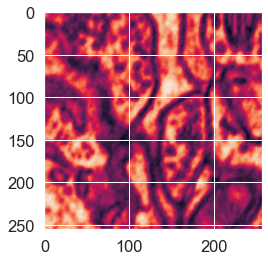

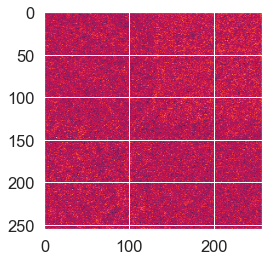

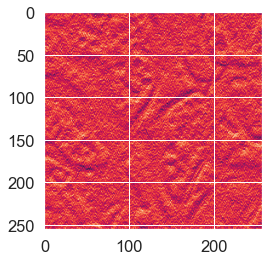

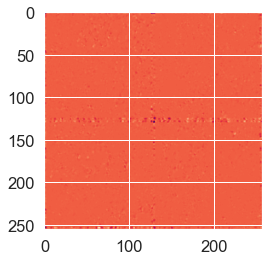

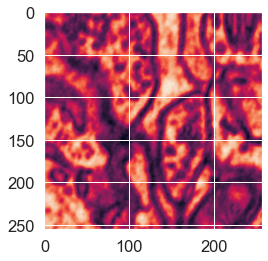

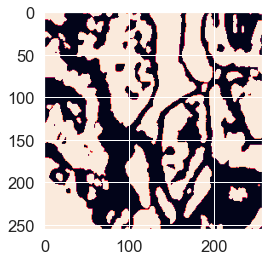

In [34]:
workflow_name = './tests/workflows/feature_set.yaml'
#workflow_name = 'tests/workflows/superegion.yaml'     
all_params, params  = run_workflow(workflow_name)

In [ ]:
# with DatasetManager(src, out=dst, dtype='uint32', fillvalue=0) as DM:
#     src_dataset = DM.sources[0]
#     src_arr = src_dataset[:]
#     DM.out[:] = testvol

# superregion workflow

In [9]:
workflow_name = './tests/workflows/supervoxel_pipeline.yaml'
all_params, params  = run_workflow(workflow_name)

{'f1': {'action': 'features.gaussian_blur', 'src': '001_raw', 'dst': '001_gaussian_blur', 'params': {'sigma': 1}}, 'f2': {'action': 'features.gaussian_blur', 'src': '001_gaussian_blur', 'dst': '002_gaussian_blur', 'params': {'sigma': 1}}, 'r1': {'action': 'regions.supervoxels', 'src': '002_gaussian_blur', 'src_group': 'features', 'dst': '001_regions', 'params': {'n_segments': 1000, 'compactness': 20}}}
+ Running f1, with features, gaussian_blur on survos://default@epfl_256c:features/001_raw
 to dst survos://default@epfl_256c:features/001_gaussian_blur {'src': 'survos://default@epfl_256c:features/001_raw', 'dst': 'survos://default@epfl_256c:features/001_gaussian_blur', 'modal': True, 'sigma': 1}

+ Running f2, with features, gaussian_blur on survos://default@epfl_256c:features/001_gaussian_blur
 to dst survos://default@epfl_256c:features/002_gaussian_blur {'src': 'survos://default@epfl_256c:features/001_gaussian_blur', 'dst': 'survos://default@epfl_256c:features/002_gaussian_blur', 'mod

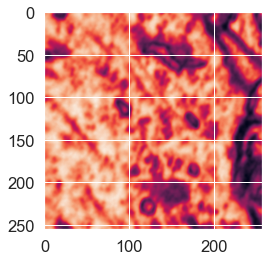

In [17]:
arr = view_dataset('002_gaussian_blur', 'features', 100)

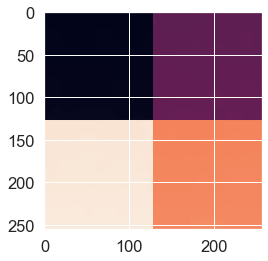

In [26]:
arr = view_dataset('002_supervoxels', 'regions', 10)

## Generating test data

In [8]:
testvol = np.random.random((99,256,256))# astype(np.uint8)


In [7]:
testvol = np.array([[[0.1761602 , 0.6701295 , 0.13151232, 0.95726678],
        [0.4795476 , 0.48114134, 0.0410548 , 0.29893265],
        [0.49127266, 0.70298447, 0.42751211, 0.08101552],
        [0.73805652, 0.83111601, 0.36852477, 0.38732476]],

       [[0.2847222 , 0.96054574, 0.25430756, 0.35403861],
        [0.54439093, 0.65897414, 0.1959487 , 0.90714872],
        [0.84462152, 0.90754182, 0.02455657, 0.26180662],
        [0.1711208 , 0.40122666, 0.54562598, 0.01419861]],

       [[0.59280376, 0.42706895, 0.86637913, 0.87831645],
        [0.57991401, 0.31989204, 0.85869799, 0.6333411 ],
        [0.21539274, 0.63780214, 0.64204493, 0.74425482],
        [0.1903691 , 0.81962537, 0.31774673, 0.34812628]],

       [[0.40880077, 0.595773  , 0.28856063, 0.19316746],
        [0.03195766, 0.62475541, 0.50762591, 0.34700798],
        [0.98913461, 0.07883111, 0.96534233, 0.57697606],
        [0.71496714, 0.70764578, 0.92294417, 0.91300531]]])

In [8]:
import h5py
test_datadir = "C:\\work\\diam\\b6\\SuRVoS2\\tmp\\"

# add dataset to workspace from file, so save array to file
map_fullpath = os.path.join(test_datadir,"testvol_4x4x4e.h5")


with h5py.File(map_fullpath,  'w') as hf:
    hf.create_dataset("data",  data=testvol)


In [9]:
testvol.astype(np.float32)

array([[[0.1761602 , 0.6701295 , 0.13151231, 0.9572668 ],
        [0.4795476 , 0.48114133, 0.0410548 , 0.29893264],
        [0.49127266, 0.70298445, 0.4275121 , 0.08101552],
        [0.73805654, 0.831116  , 0.36852476, 0.38732475]],

       [[0.2847222 , 0.9605457 , 0.25430757, 0.3540386 ],
        [0.5443909 , 0.6589741 , 0.1959487 , 0.9071487 ],
        [0.84462154, 0.9075418 , 0.02455657, 0.2618066 ],
        [0.1711208 , 0.40122667, 0.545626  , 0.01419861]],

       [[0.5928038 , 0.42706895, 0.86637914, 0.87831646],
        [0.57991403, 0.31989205, 0.858698  , 0.6333411 ],
        [0.21539274, 0.6378021 , 0.6420449 , 0.7442548 ],
        [0.1903691 , 0.8196254 , 0.31774673, 0.3481263 ]],

       [[0.40880078, 0.595773  , 0.28856063, 0.19316746],
        [0.03195766, 0.6247554 , 0.50762594, 0.347008  ],
        [0.9891346 , 0.07883111, 0.96534234, 0.57697606],
        [0.71496713, 0.7076458 , 0.9229442 , 0.9130053 ]]], dtype=float32)

In [15]:
testvol = testvol - np.min(testvol)

In [17]:
testvol / np.max(testvol)

array([[[0.16612536, 0.67279379, 0.12032965, 0.9673129 ],
        [0.47731235, 0.47894706, 0.02754662, 0.29205408],
        [0.48933884, 0.70649341, 0.42393911, 0.06853466],
        [0.74246711, 0.837919  , 0.3634353 , 0.38271861]],

       [[0.27747831, 0.97067616, 0.24628176, 0.34857673],
        [0.54382269, 0.66135165, 0.18642259, 0.91590639],
        [0.85177172, 0.91630959, 0.01062425, 0.2539736 ],
        [0.1609564 , 0.3969779 , 0.54508949, 0.        ]],

       [[0.59348014, 0.42348456, 0.87408868, 0.88633289],
        [0.58025901, 0.3135523 , 0.86621007, 0.63505962],
        [0.2063665 , 0.63963535, 0.64398722, 0.74882475],
        [0.18069954, 0.82613296, 0.31135184, 0.3425124 ]],

       [[0.40474673, 0.59652571, 0.28141542, 0.18356984],
        [0.01821561, 0.62625321, 0.5061125 , 0.34136535],
        [1.        , 0.0662941 , 0.97559606, 0.57724553],
        [0.71878414, 0.71127456, 0.93210791, 0.92191354]]])

In [10]:
map_fullpath

'C:\\work\\diam\\b6\\SuRVoS2\\tmp\\testvol_4x4x4e.h5'

## Gaussian blur

In [11]:
test_workspace_name = "testing123e"
# create new workspace
survos.run_command("workspace", "create", uri=None, workspace=test_workspace_name)
    
# add data to workspace
survos.run_command('workspace', 'add_data', uri=None, workspace=test_workspace_name,
                 data_fname=map_fullpath,
                  dtype='float32')

# run gaussian_blur    
DataModel.g.current_workspace = test_workspace_name

src = DataModel.g.dataset_uri('__data__', None)
dst = DataModel.g.dataset_uri('001_gaussian_blur', group='features')

survos.run_command('features', 'gaussian_blur', uri=None, 
                  src=src,
                  dst=dst)


2020-09-16 11:03:24.799 | DEBUG    | survos2.survos:run_command:101 - Using client <hug.use.Local object at 0x0000025892D614A8>
2020-09-16 11:03:25.099 | DEBUG    | survos2.model.workspace:__init__:36 - INIT workspace at C:\work\diam\data\testing123e
2020-09-16 11:03:25.100 | DEBUG    | survos2.model.workspace:available_sessions:118 - available sessions: no data
2020-09-16 11:03:25.101 | INFO     | survos2.survos:run_command:105 - Local client gave response Response(data={'data': {'path': 'C:\\work\\diam\\data\\testing123e', 'data': {}}, 'error': False}, status_code=200, headers={'content-type': 'application/json'})
2020-09-16 11:03:25.102 | DEBUG    | survos2.survos:run_command:101 - Using client <hug.use.Local object at 0x0000025892D614A8>
2020-09-16 11:03:25.380 | DEBUG    | survos2.model.workspace:__init__:36 - INIT workspace at testing123e
2020-09-16 11:03:25.381 | DEBUG    | survos2.model.workspace:__init__:36 - INIT workspace at testing123e
2020-09-16 11:03:25.382 | INFO     | s

({'kind': 'gaussian_blur',
  'name': 'gaussian_blur',
  'source': '__data__',
  'id': '001_gaussian_blur'},
 False)

In [12]:
with DatasetManager(src, out=dst, dtype='float32', fillvalue=0) as DM:
    print(DM.sources[0].shape)
    src_dataset = DM.sources[0]
    dst_dataset = DM.out
    src_arr = src_dataset[:]
    dst_arr = dst_dataset[:]

2020-09-16 11:03:36.104 | INFO     | survos2.io:survos_from_uri:170 - running survos_from_uri on survos:// uri
2020-09-16 11:03:36.105 | DEBUG    | survos2.io:survos_from_uri:181 - Calling Workspace() Init with workspace name: testing123e
2020-09-16 11:03:36.106 | DEBUG    | survos2.model.workspace:__init__:36 - INIT workspace at testing123e
2020-09-16 11:03:36.108 | INFO     | survos2.model.dataset:_load:113 - Loading dataset on C:\work\diam\data\testing123e\__data__
2020-09-16 11:03:36.111 | INFO     | survos2.model.dataset:_load:113 - Loading dataset on C:\work\diam\data\testing123e\__data__
2020-09-16 11:03:36.114 | INFO     | survos2.improc.utils:__init__:545 - DatasetManager setting out to survos://default@testing123e:features/001_gaussian_blur
2020-09-16 11:03:36.115 | INFO     | survos2.io:survos_from_uri:170 - running survos_from_uri on survos:// uri
2020-09-16 11:03:36.116 | DEBUG    | survos2.io:survos_from_uri:181 - Calling Workspace() Init with workspace name: testing123e


(4, 4, 4)


In [13]:
src_arr

array([[[0.16612536, 0.67279379, 0.12032965, 0.9673129 ],
        [0.47731235, 0.47894706, 0.02754662, 0.29205408],
        [0.48933884, 0.70649341, 0.42393911, 0.06853466],
        [0.74246711, 0.837919  , 0.3634353 , 0.38271861]],

       [[0.27747831, 0.97067616, 0.24628176, 0.34857673],
        [0.54382269, 0.66135165, 0.18642259, 0.91590639],
        [0.85177172, 0.91630959, 0.01062425, 0.2539736 ],
        [0.1609564 , 0.3969779 , 0.54508949, 0.        ]],

       [[0.59348014, 0.42348456, 0.87408868, 0.88633289],
        [0.58025901, 0.3135523 , 0.86621007, 0.63505962],
        [0.2063665 , 0.63963535, 0.64398722, 0.74882475],
        [0.18069954, 0.82613296, 0.31135184, 0.3425124 ]],

       [[0.40474673, 0.59652571, 0.28141542, 0.18356984],
        [0.01821561, 0.62625321, 0.5061125 , 0.34136535],
        [1.        , 0.0662941 , 0.97559606, 0.57724553],
        [0.71878414, 0.71127456, 0.93210791, 0.92191354]]])

In [14]:
dst_arr

array([[[0.74038231, 0.73159289, 0.77275133, 0.77576953],
        [0.79589951, 0.75562441, 0.73596132, 0.69552565],
        [0.85513246, 0.78190953, 0.69272739, 0.6023525 ],
        [0.89412093, 0.80390519, 0.67238283, 0.54834819]],

       [[0.76133442, 0.76884651, 0.81162232, 0.82221597],
        [0.80070102, 0.78692716, 0.78844988, 0.76941949],
        [0.83953571, 0.80411625, 0.75864875, 0.70402271],
        [0.86765569, 0.8197667 , 0.74367511, 0.66316062]],

       [[0.76932758, 0.78753561, 0.81773269, 0.82297021],
        [0.80375987, 0.8157894 , 0.83207965, 0.83083189],
        [0.8386035 , 0.84762281, 0.85133541, 0.84130776],
        [0.87149698, 0.87588441, 0.8668381 , 0.84665996]],

       [[0.75553131, 0.78530908, 0.81172532, 0.81834841],
        [0.79445744, 0.82855892, 0.85924077, 0.8747862 ],
        [0.84409612, 0.88603979, 0.92568022, 0.94928974],
        [0.89486092, 0.93642706, 0.97544533, 1.        ]]])

In [ ]:
%%run_pytest[clean] -qq

test_datadir = "D:\\datasets"
test_workspace_name = "testvol_24"
# make test vol
map_fullpath = os.path.join(test_datadir,"testvol_4x4x4b.h5")
#testvol = np.random.random((4,4,4))# astype(np.uint8)
#with h5py.File(map_fullpath,  'w') as hf:
#    hf.create_dataset("data",  data=testvol)

# create new workspace
survos.run_command("workspace", "create", uri=None, workspace=test_workspace_name)
    
# add data to workspace
survos.run_command('workspace', 'add_data', uri=None, workspace=test_workspace_name,
                 data_fname=map_fullpath,
                  dtype='float32')

## add dataset to workspace

# run gaussian_blur    
DataModel.g.current_workspace = test_workspace_name

src = DataModel.g.dataset_uri('__data__', None)
dst = DataModel.g.dataset_uri('001_gaussian_blur', group='features')

survos.run_command('features', 'gaussian_blur', uri=None, 
                  src=src,
                  dst=dst)

with DatasetManager(src, out=dst, dtype='float32', fillvalue=0) as DM:
    print(DM.sources[0].shape)
    src_dataset = DM.sources[0]
    dst_dataset = DM.out
    src_arr = src_dataset[:]
    dst_arr = dst_dataset[:]
    
def test_feature_shape():
    assert dst_arr.shape == (4,4,4)
    
def test_feature_src():    
    assert_allclose(src_arr, np.array([[[0.41955446, 0.65139688, 0.50626089, 0.47356243],
                            [0.5397072 , 0.88715651, 0.57358875, 0.17841908],
                            [0.84062367, 0.42927081, 1.        , 0.601415  ],
                            [0.22624536, 0.61382118, 0.81198787, 0.45563817]],

                           [[0.26604622, 0.98411002, 0.9910637 , 0.04614431],
                            [0.91235452, 0.50873271, 0.9090851 , 0.55183262],
                            [0.69766631, 0.34353716, 0.79863059, 0.81746442],
                            [0.69540008, 0.25363482, 0.        , 0.98832664]],

                           [[0.41824034, 0.2947538 , 0.823542  , 0.02814557],
                            [0.22670235, 0.86729335, 0.28522538, 0.31510756],
                            [0.25549214, 0.1451409 , 0.30383666, 0.74032794],
                            [0.50077333, 0.51566668, 0.30102867, 0.72429019]],

                           [[0.6533611 , 0.66302082, 0.55634748, 0.71185593],
                            [0.94052145, 0.61666328, 0.9143069 , 0.12840489],
                            [0.12144252, 0.84725333, 0.92758133, 0.49322578],
                            [0.54037618, 0.051214  , 0.25104931, 0.87874488]]]))
    
def test_feature_dst():    
    assert_allclose(dst_arr, np.array([[[0.1666268 , 0.2257143 , 0.21892974, 0.14923   ],
                                        [0.22236633, 0.30317545, 0.29989442, 0.21237083],
                                        [0.21442178, 0.29576921, 0.29921022, 0.22003345],
                                        [0.14868982, 0.20833325, 0.21602006, 0.16522714]],

                                       [[0.22320336, 0.30302912, 0.29496408, 0.20176643],
                                        [0.29272896, 0.40102041, 0.39890146, 0.28483036],
                                        [0.27765584, 0.38559583, 0.39318019, 0.2930665 ],
                                        [0.18990593, 0.26771539, 0.2803525 , 0.21866953]],

                                       [[0.21965253, 0.29812005, 0.29064476, 0.19943923],
                                        [0.28396353, 0.39044347, 0.38968769, 0.27962744],
                                        [0.26546711, 0.37147775, 0.38107473, 0.28643546],
                                        [0.17921498, 0.25512561, 0.26955697, 0.21300924]],

                                       [[0.16236468, 0.21962528, 0.21409421, 0.14734329],
                                        [0.20654736, 0.28440154, 0.28422096, 0.20433155],
                                        [0.18955445, 0.26714209, 0.27526605, 0.20778845],
                                        [0.12524115, 0.18044972, 0.19238257, 0.15347627]]]))


In [8]:
import h5py
#from survos2.improc.utils import DatasetManager
from torch.testing import assert_allclose
import numpy as np
testvol = np.random.random((4,4,4))# astype(np.uint8)
testvol

array([[[4.89214115e-01, 4.88751237e-02, 3.94843333e-01, 6.14048171e-01],
        [3.92100031e-01, 6.81171935e-01, 1.81597195e-01, 8.00303290e-01],
        [5.01298600e-01, 5.71608870e-01, 1.22835539e-01, 5.01740551e-01],
        [1.12990600e-01, 7.46636931e-01, 5.20574562e-01, 8.55714714e-01]],

       [[8.12483800e-03, 3.01362385e-03, 4.38506096e-01, 1.93867574e-02],
        [2.56053374e-01, 7.88485971e-01, 3.96912904e-01, 4.79070101e-01],
        [7.29253366e-01, 9.78596473e-01, 4.51489531e-01, 6.20425318e-01],
        [8.67330197e-01, 1.24240882e-01, 7.99268773e-01, 2.08207312e-01]],

       [[9.74542099e-01, 2.74473133e-01, 4.25815244e-01, 1.49041921e-01],
        [1.83750375e-01, 8.15605562e-01, 9.85184681e-01, 2.51071510e-01],
        [8.75301005e-02, 5.27213367e-01, 2.21638196e-01, 6.06119378e-01],
        [5.02913560e-01, 9.94965983e-01, 1.46799760e-01, 3.69431563e-01]],

       [[3.38063000e-01, 2.36308478e-01, 7.47581840e-01, 3.89268267e-02],
        [6.61555719e-01, 9.67296

# Test superregions

In [ ]:
# def supervoxels(
#     src: DataURIList,
#     dst: DataURI,
#     n_segments: Int = 10,
#     compactness: Float = 20,
#     spacing: FloatList = [1, 1, 1],
#     multichannel: SmartBoolean = False,
#     enforce_connectivity: SmartBoolean = False,
# ):

In [5]:
from survos2.api.regions import supervoxels

In [6]:
result = survos.run_command('regions', 'create', uri=None, workspace=workspace_name)

In [7]:
result

({'name': '002 Supervoxels', 'kind': 'supervoxels', 'id': '002_supervoxels'},
 False)

In [8]:
features_src = DataModel.g.dataset_uri("002_gaussian_blur", group="features")
dst = DataModel.g.dataset_uri(result[0]['id'], group='regions')     

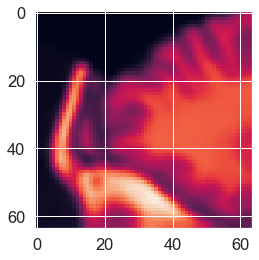

In [12]:

arr = view_dataset('002_gaussian_blur', 'features', 10)

In [24]:
result = supervoxels([features_src], 
                     dst,
                    n_segments=100,
                    compactness=0.5,
                    spacing=[1,1,1],
                    multichannel=False,
                    enforce_connectivity=False)

In [25]:
result

{'compactness': 0.5,
 'enforce_connectivity': False,
 'kind': 'supervoxels',
 'multichannel': False,
 'n_segments': 100,
 'name': '002 Supervoxels',
 'num_supervoxels': 125,
 'source': ['002_gaussian_blur'],
 'spacing': [1, 1, 1],
 'id': '002_supervoxels'}

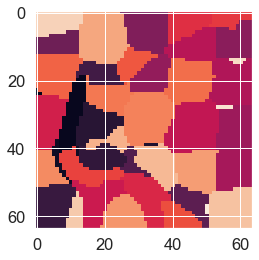

In [26]:
%matplotlib inline
arr = view_dataset('002_supervoxels', 'regions', 40)

# Test prediction

In [4]:
from survos2.server.superseg import sr_predict

In [ ]:
sr_predict(
supervoxel_image,
anno_image,
feature_images,
refine=False,
lam = 1.0,
num_components = 0)

In [22]:
anno_id = "002_level"
region_id = "001_supervoxels"
feature_ids = ["002_gblur", "001_raw"]
classifier_type = "rf"
projection_type = None
refine = False
lam = 1.0,
num_components = 0

In [9]:
# get anno
src = DataModel.g.dataset_uri(anno_id, group="annotations")
with DatasetManager(src, out=None, dtype="uint16", fillvalue=0) as DM:
    src_dataset = DM.sources[0]
    anno_image = src_dataset[:] & 15


In [12]:
# get superregions
src = DataModel.g.dataset_uri(region_id, group="regions")
with DatasetManager(src, out=None, dtype="uint32", fillvalue=0) as DM:
    src_dataset = DM.sources[0]
    supervoxel_image = src_dataset[:]


In [15]:
# get features
features = []

for feature_id in feature_ids:
    src = DataModel.g.dataset_uri(feature_id, group="features")
    logger.debug(f"Getting features {src}")

    with DatasetManager(src, out=None, dtype="float32", fillvalue=0) as DM:
        src_dataset = DM.sources[0]
        logger.debug(f"Adding feature of shape {src_dataset.shape}")
        features.append(src_dataset[:])


In [19]:
superseg_cfg = cfg.pipeline
superseg_cfg["type"] = classifier_type
superseg_cfg["predict_params"]["proj"] = projection_type

    

In [20]:
superseg_cfg

{'calculate_features': True,
 'calculate_supervoxels': True,
 'load_pretrained_classifier': True,
 'load_annotation': False,
 'predict_params': {'clf': 'ensemble',
  'type': 'rf',
  'n_estimators': 10,
  'proj': None,
  'max_depth': 20,
  'n_jobs': 1},
 'mask_params': {'mask_radius': 10},
 'type': 'rf'}

In [26]:
logger.debug(
    f"sr_predict with {len(features)} features and anno of shape {anno_image.shape} and sr of shape {supervoxel_image.shape}"
)

segmentation = sr_predict(
    supervoxel_image,
    anno_image,
    features,
    superseg_cfg,
    refine,
    lam,
    num_components,
)

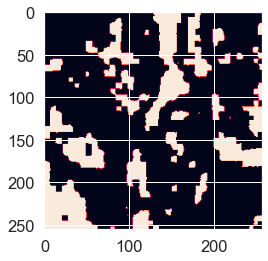

In [32]:
plt.imshow(segmentation[12,:])

In [33]:
segmentation.shape

(256, 256, 256)

# Label parenting

({'name': '002 Level', 'kind': 'level', 'modified': [0], 'id': '002_level'},
 False)

In [19]:
survos.run_command('annotations', 'get_levels', uri=None, workspace=workspace_name)


([{'kind': 'level',
   'labels': {'2': {'color': '#f12ba5',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#e12e17', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [15],
   'name': '001 Level',
   'id': '001_level'},
  {'kind': 'level',
   'labels': {'2': {'color': '#FF0000',
     'idx': 2,
     'name': 'Labelname',
     'parent_label': -1,
     'parent_level': '-1',
     'visible': True},
    '3': {'color': '#000000', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [0],
   'name': '002 Level',
   'id': '002_level'}],
 False)

In [11]:

result = survos.run_command('annotations', 'add_level', uri=None, workspace=workspace_name)
result

({'name': '003 Level', 'kind': 'level', 'modified': [0], 'id': '003_level'},
 False)

In [14]:
params = dict(level="002_level")
result = survos.run_command('annotations', 'add_label', uri=None, workspace=workspace_name, **params)
result

({'idx': 3, 'name': 'Label', 'color': '#000000', 'visible': True}, False)

In [15]:
survos.run_command('annotations', 'get_labels', uri=None, workspace=workspace_name, level='002_level')


({'2': {'idx': 2, 'name': 'Label', 'color': '#000000', 'visible': True},
  '3': {'idx': 3, 'name': 'Label', 'color': '#000000', 'visible': True}},
 False)

In [17]:
label = dict(
            idx=2,
            name="Labelname",
            color="#FF0000",
            visible=True,
        )
params = dict(level="002_level", )
result = survos.run_command('annotations', 'update_label', uri=None, workspace=workspace_name, **params, **label)


In [18]:
survos.run_command('annotations', 'get_labels', uri=None, workspace=workspace_name, level='002_level')


({'2': {'idx': 2, 'name': 'Labelname', 'color': '#FF0000', 'visible': True},
  '3': {'idx': 3, 'name': 'Label', 'color': '#000000', 'visible': True}},
 False)

In [ ]:
survos.run_command('annotations', 'get_labels', uri=None, workspace=workspace_name, level='002_level')


In [ ]:
survos.run_command('annotations', 'set_label_parent', uri=None, workspace=workspace_name, level='002_level')


In [10]:
from survos2.utils import encode_numpy_bytes, encode_numpy2

In [4]:
import numpy as np

In [8]:
a = np.array([1.0,2.0,3.0,4.0,5.0])


In [12]:
encode_numpy2(a)

'{"array": [1.0, 2.0, 3.0, 4.0, 5.0]}'

In [9]:
encode_numpy_bytes(a)

{'_rtype': 'ndarray',
 '_rvalue': b'\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x08@\x00\x00\x00\x00\x00\x00\x10@\x00\x00\x00\x00\x00\x00\x14@',
 '_rshape': (5,),
 '_rdtype': 'float64'}

In [4]:

src = DataModel.g.dataset_uri('001_level', group='annotations')     

survos.run_command('roi','pull_anno',  uri=None, workspace=workspace_name, roi_fname='vf_down2_roi_0_82_128_256_120_256')

DEBUG - API: <hug.api.API object at 0x000001FFA62B9430>
  - survos2.survos:init_api:58
INFO - Config plugins: ['workspace', 'render', 'server', 'roi', 'features', 'superregions', 'annotations', 'pipelines', 'objects', 'analyzer', 'export']  - survos2.survos:init_api:67
INFO - Configuring api plugins  - survos2.survos:init_api:70
DEBUG - Loading plugin workspace  - survos2.survos:init_api:72
DEBUG - Loading plugin render  - survos2.survos:init_api:72
DEBUG - Loading plugin server  - survos2.survos:init_api:72
DEBUG - Loading plugin roi  - survos2.survos:init_api:72
DEBUG - Loading plugin features  - survos2.survos:init_api:72
DEBUG - Loading plugin superregions  - survos2.survos:init_api:72
DEBUG - Loading plugin annotations  - survos2.survos:init_api:72
DEBUG - Loading plugin pipelines  - survos2.survos:init_api:72
DEBUG - Loading plugin objects  - survos2.survos:init_api:72
DEBUG - Loading plugin analyzer  - survos2.survos:init_api:72
DEBUG - Loading plugin export  - survos2.survos:in

(82, 128, 136)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


({'done': True}, False)

In [6]:
roi_fname='vfcrop4_roi_20_148_20_148_20_148'
roi_parts = roi_fname.split("_")

['vfcrop4', 'roi', '20', '148', '20', '148', '20', '148']

In [ ]:
z_min = roi_parts[2]
z_max = roi_parts[3]
x_min = roi_parts[4]
x_max = roi_parts[5]
y_min = roi_parts[6]
y_max = roi_parts[7]


In [42]:
from survos2.entity.sampler import (sample_bvol, 
                                    generate_random_points_in_volume, 
                                    viz_bvols, 
                                    centroid_to_bvol, 
                                    offset_points,
                                    grid_of_points,
                                    sample_marked_patches)

In [10]:

img_vol = np.ones((10,10,10))
result = sample_bvol(img_vol, (2,8,2,8,2,8)) 
result.shape
assert(result.shape == (6,6,6))

In [12]:
img_vol = np.ones((10,10,10))
result = generate_random_points_in_volume(img_vol, 10, border=(0,0,0))
assert result.shape[0] == 10 and result.shape[1] == 4

In [20]:
points = np.array([[10,10,10,0],[10,20,20,0],[10,30,30,0],[10,40,40,0],[10,50,50,0]])
result = centroid_to_bvol(points)
assert result.shape == (5,6)

(5, 4)

In [29]:
points

array([[10, 10, 10,  0],
       [10, 20, 20,  0],
       [10, 30, 30,  0],
       [10, 40, 40,  0],
       [10, 50, 50,  0]])

In [32]:
result = offset_points(points, (10,10,10))
assert result[0][0] == points[0][0] + 10

In [41]:
img_vol = np.ones((32,32,32))
result = grid_of_points(img_vol, (4,4,4), (2,2,2))
assert result[0][0] == 4
assert result.shape[0] == 8
img_vol = np.ones((32,32,32))
result = grid_of_points(img_vol, (4,4,4), (4,4,4))
assert result.shape[0] == 64

(2, 2, 2) (2, 2, 2) (2, 2, 2)
(4, 4, 4) (4, 4, 4) (4, 4, 4)


In [51]:
img_vol = np.ones((64,64,64))
pts = grid_of_points(img_vol, (4,4,4), (32,32,32))
img_volume = np.random.random((64,64,64))
#padded_anno = (np.random((32,32,32)) > 0.5) * 1.0
locs = np.array([[10,10,10,0],[10,20,20,0],[10,30,30,0],[10,40,40,0],[10,50,50,0]])
result = sample_marked_patches(img_volume, locs, pts, patch_size=(4, 4, 4))
assert result.vols.shape == (5,4,4,4)
result.vols_pts.shape[0] == 5
result.vols_pts[0][0] == [1,1,1,0]

(32, 32, 32) (32, 32, 32) (32, 32, 32)
Generating 5 patch volumes from image of shape (64, 64, 64)
Generated 5 MarkedPatches of shape (5, 4, 4, 4)


array([ True,  True,  True,  True])

In [67]:
from survos2.entity.entities import (make_bounding_vols, make_entity_mask, make_entity_df, uncrop_pad)

In [65]:
result = make_entity_df(points)
import pandas as pd
assert isinstance(result, pd.DataFrame)


In [66]:
assert result.shape == (5,4)

In [69]:
img_vol.shape

(64, 64, 64)

In [72]:
result = uncrop_pad(img_vol, (96,96,96), (16,80,16,80,16,80))

In [74]:

assert result.shape == (96,96,96)
assert result[0][0][0] == 0.0

0.0

In [94]:
img_vol = np.ones((128,128,128))
points = np.array([[32,32,32,0],[32,42,42,0],[32,52,52,0],[32,62,62,0],[32,72,72,0]])
result = centroid_to_bvol(points)
result = make_entity_mask(img_vol, points,bvol_dim=(4,4,4))
# returns a padded volume
assert result[0].shape == (136,136,136)
 

DEBUG - Offset: -4, -4, -4  - survos2.entity.entities:offset_points:129


Making 5 bvols


(136, 136, 136)

(80, 80, 80)

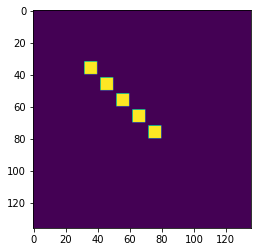

In [93]:
%matplotlib inline
plt.imshow(result[0][32,:])

In [2]:
from survos2.entity.components import measure_components, filter_proposal_mask, filter_small_components, measure_regions, measure_big_blobs

In [3]:
from matplotlib import pyplot as plt
import numpy as np

img = np.zeros((32,32,32))
img[8:12,8:12,8:12] = 1
img[8:12, 24:28,24:28] = 1
result = measure_components(img)
assert result.shape == (2,11)

Measured 2 features


In [7]:
result = measure_big_blobs([img])

For image 0, out of 0, keeping 0 components
For image 1, out of 0, keeping 0 components
For image 2, out of 0, keeping 0 components
For image 3, out of 0, keeping 0 components
For image 4, out of 0, keeping 0 components
For image 5, out of 0, keeping 0 components
For image 6, out of 0, keeping 0 components
For image 7, out of 0, keeping 0 components
For image 8, out of 2, keeping 2 components


KeyError: 'bb_f_x'

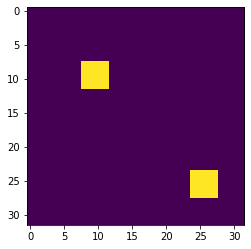

In [10]:
plt.imshow(img[8,:])

Measured 2 features


In [14]:
result.shape

(2, 11)

In [27]:
result = filter_proposal_mask(img, num_erosions=0, num_dilations=3, num_medians=0)
assert result.shape == (32,32,32)
assert np.sum(result) > np.sum(img)

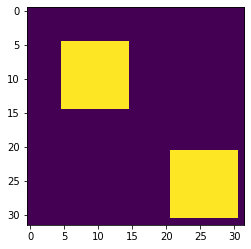

For image 0, out of 3, keeping 2 components


In [35]:
img = np.zeros((32,32,32))
img[8:12,8:12,8:12] = 1
img[8:12, 24:28,24:28] = 1
img[8:12,16:18,16:18] = 1
result= filter_small_components([img], min_component_size=16)[0]
assert np.sum(result) < np.sum(img)

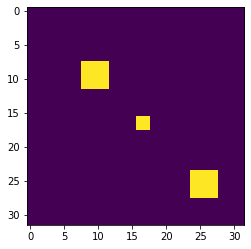

In [36]:
plt.imshow(img[8,:])

In [52]:
img = np.zeros((32,32,32))
img[8:12,8:12,8:12] = 1
result = measure_regions([img.astype(np.uint32)])
assert result[0].shape == (1,11)

In [53]:
train_3d_fcn(
    src: DataURI,
    dst: DataURI,
    workspace: String,
    anno_id: DataURI,
    feature_id: DataURI,
    objects_id: DataURI,
    fpn_train_params: dict,
    num_samples: Int,
    num_epochs : Int,
    num_augs : Int,
    padding: IntOrVector = 32,
    grid_dim: IntOrVector = 4,
    patch_size: IntOrVector = 64,
    patch_overlap: IntOrVector = 16,
    fcn_type: String = 'fpn3d',
    threshold: Float = 0.5,

):

In [ ]:
src = DataModel.g.dataset_uri(anno_id, group="annotations")

In [18]:
params = { "src": DataModel.g.dataset_uri("010_train_3d_fcn", group="annotations"),
          "dst": DataModel.g.dataset_uri("010_train_3d_fcn", group="annotations"),
          'anno_id': "005_level",
          'feature_id': "001_raw",
          'objects_id': "001_points",
          'fpn_train_params': {},
          'num_samples': 400,
          'num_epochs': 10,
          'num_augs':1,
          'padding': (32,32,32),
          'patch_size': (64,64,64),
          'patch_overlap': (32,32,32),
          'fcn_type': 'fpn3d',
          'threshold': 0.5
          
}
survos.run_command('pipelines','train_3d_fcn',  uri=None, workspace=workspace_name, **params)

DEBUG - Using client <hug.use.Local object at 0x2abae1f535e0>  - survos2.survos:run_command:111
DEBUG - get request to client: train_3d_fcn  - survos2.survos:run_command:114
DEBUG - save_metadata wrapper: src survos://default@vf_main2_oct06:annotations/010_train_3d_fcn, dst survos://default@vf_main2_oct06:annotations/010_train_3d_fcn  - survos2.api.utils:wrapper:64
DEBUG - Train_3d fcn using anno 005_level and feature 001_raw  - survos2.api.pipelines:train_3d_fcn:658
INFO - running survos_from_uri on survos:// uri  - survos2.io:survos_from_uri:166
DEBUG - Calling Workspace() Init with workspace name: vf_main2_oct06  - survos2.io:survos_from_uri:177


()
{'anno_id': '005_level',
 'fcn_type': 'fpn3d',
 'feature_id': '001_raw',
 'fpn_train_params': {'context': {}},
 'num_augs': 1,
 'num_epochs': 10,
 'num_samples': 400,
 'objects_id': '001_points',
 'padding': [32, 32, 32],
 'patch_overlap': [32, 32, 32],
 'patch_size': [64, 64, 64],
 'threshold': 0.5,
 'workspace': 'vf_main2_oct06'}


INFO - Closed: <survos2.model.dataset.Dataset object at 0x2ab76ff317f0>  - survos2.improc.utils:__exit__:568
INFO - running survos_from_uri on survos:// uri  - survos2.io:survos_from_uri:166
DEBUG - Calling Workspace() Init with workspace name: vf_main2_oct06  - survos2.io:survos_from_uri:177
DEBUG - Using dataset <survos2.model.dataset.Dataset object at 0x2ab76fff0160>  - survos2.api.objects:get_entities:142
INFO - Closed: <survos2.model.dataset.Dataset object at 0x2ab76fff0160>  - survos2.improc.utils:__exit__:568
INFO - Setting up entities /dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/default/objects/001_points/gold_ed_july17.csv  - survos2.api.objects:get_entities:150
DEBUG - Loaded entities (680, 4) applying scale 1.0 and offset [0.0, 0.0, 0.0] and crop start [0.0, 0.0, 0.0], crop_end [10000.0, 10000.0, 10000.0]  - survos2.frontend.components.entity:setup_entity_table:56
DEBUG - Loading entities  - survos2.frontend.components.entity:setup_entity_table:79


Reading entity csv: /dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/default/objects/001_points/gold_ed_july17.csv
     Unnamed: 0    z    x    y  class_code
0             0   25  728   23           0
1             1   25  525   82           0
2             2   30  433  226           0
3             3   27  244  435           0
4             4   26  357  437           0
..          ...  ...  ...  ...         ...
675         675   95  546  653           0
676         676   95  366  706           0
677         677  106  944  683           0
678         678  106  866  815           0
679         679  108  799  725           0

[680 rows x 5 columns]
False
----------------------------------------------------------------------------------------------------


DEBUG - Loaded 680 entities.  - survos2.frontend.components.entity:setup_entity_table:101
INFO - running survos_from_uri on survos:// uri  - survos2.io:survos_from_uri:166
DEBUG - Calling Workspace() Init with workspace name: vf_main2_oct06  - survos2.io:survos_from_uri:177
INFO - Closed: <survos2.model.dataset.Dataset object at 0x2ab77002dd30>  - survos2.improc.utils:__exit__:568
DEBUG - Obtained annotation level with labels [0 1]  - survos2.api.pipelines:train_3d_fcn:705
DEBUG - Making patches in path /dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/default/annotations/005_level  - survos2.api.pipelines:train_3d_fcn:706


Making patches for 680 locations


 WARNING | No handles with labels found to put in legend.


Making 680 bvols
Plotting at location: 64, 725, 725


 WARNING | No handles with labels found to put in legend.


Augmented point locations (680, 4)
Plotting at location: 64, 725, 725
Generating 680 patch volumes from image of shape (192, 1514, 1514)
Generated 680 MarkedPatches of shape (680, 64, 64, 64)
Generating 680 patch volumes from image of shape (192, 1514, 1514)
Generated 680 MarkedPatches of shape (680, 64, 64, 64)
Marked patches, unique label vols [0. 1.], img mean: 0.5195530402297261
raw_X_train (1632, 64, 64, 64), raw_X_test (408, 64, 64, 64), raw_y_train(1632, 64, 64, 64), raw_y_test(408, 64, 64, 64)
Unique mask values: [0. 1.]
Unique mask values: [0. 1.]
Unique mask values: [0. 1.]
Unique mask values: [0. 1.]
Unique mask values: [0. 1.]
Unique mask values: [0. 1.]
Unique mask values: [0. 1.]
Unique mask values: [0. 1.]
Unique mask values: [0. 1.]
Unique mask values: [0. 1.]
Augmented image vols shape (2040, 64, 64, 64), label vols shape (2040, 64, 64, 64)
Saving image vols /dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/default/annotations/005_level/vf_main2_oct06_patch_vols204

INFO - Saving fcn model to: /dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/fcn/18072022_18_14_37_trained_fcn_model  - survos2.api.pipelines:train_3d_fcn:721


Saving image vols /dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/default/annotations/005_level/vf_main2_oct06_patch_vols_2040_mask_gt_1807_1814.h5
<KeysViewHDF5 ['data']>
<KeysViewHDF5 ['data']>
(2040, 64, 64, 64) (2040, 64, 64, 64)
Prepared train X : (1836, 64, 64, 64) and train y: (1836, 64, 64, 64)  and test X: (204, 64, 64, 64) and test y (204, 64, 64, 64)
Device cuda:0
Dim: 3 2
n_input_channels:36 
n_output_channels: 2 with number of classes: 2


Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/1836 [00:00<?, ?it/s]

Avg training loss: 0.5985191249509783


Validation:   0%|          | 0/204 [00:00<?, ?it/s]

Avg validation loss: 0.5677410349542019


Training:   0%|          | 0/1836 [00:00<?, ?it/s]

Avg training loss: 0.5787371510156879


Validation:   0%|          | 0/204 [00:00<?, ?it/s]

Avg validation loss: 0.5580465249425056


Training:   0%|          | 0/1836 [00:00<?, ?it/s]

Avg training loss: 0.5665382576555814


Validation:   0%|          | 0/204 [00:00<?, ?it/s]

Avg validation loss: 0.5508588364019114


Training:   0%|          | 0/1836 [00:00<?, ?it/s]

Avg training loss: 0.5579222333587073


Validation:   0%|          | 0/204 [00:00<?, ?it/s]

Avg validation loss: 0.5447638762347838


Training:   0%|          | 0/1836 [00:00<?, ?it/s]

Avg training loss: 0.5502365002380217


Validation:   0%|          | 0/204 [00:00<?, ?it/s]

Avg validation loss: 0.5388009831601498


Training:   0%|          | 0/1836 [00:00<?, ?it/s]

Avg training loss: 0.5437371948721752


Validation:   0%|          | 0/204 [00:00<?, ?it/s]

Avg validation loss: 0.5341107468638155


Training:   0%|          | 0/1836 [00:00<?, ?it/s]

Avg training loss: 0.5384746930363985


Validation:   0%|          | 0/204 [00:00<?, ?it/s]

Avg validation loss: 0.5310409247290855


Training:   0%|          | 0/1836 [00:00<?, ?it/s]

Avg training loss: 0.5334220497172999


Validation:   0%|          | 0/204 [00:00<?, ?it/s]

Avg validation loss: 0.5270398301346337


Training:   0%|          | 0/1836 [00:00<?, ?it/s]

Avg training loss: 0.5290108939217499


Validation:   0%|          | 0/204 [00:00<?, ?it/s]

Avg validation loss: 0.5243718705762965


Training:   0%|          | 0/1836 [00:00<?, ?it/s]

Avg training loss: 0.5250054776489994


Validation:   0%|          | 0/204 [00:00<?, ?it/s]

Avg validation loss: 0.5216085675008156


INFO - running survos_from_uri on survos:// uri  - survos2.io:survos_from_uri:166
DEBUG - Calling Workspace() Init with workspace name: vf_main2_oct06  - survos2.io:survos_from_uri:177


Saved model fpn3d_fullblob1807_1851.pt


INFO - Closed: <survos2.model.dataset.Dataset object at 0x2ab771db4910>  - survos2.improc.utils:__exit__:568


Using fpn3d
Device cuda:0
Dim: 3 2
n_input_channels:36 
n_output_channels: 2 with number of classes: 2
Predicting segmentation on volume of shape (128, 1450, 1450)
Loaded model from /dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/fcn/18072022_18_14_37_trained_fcn_model/fpn3d_fullblob1807_1851.pt
(128, 1450, 1450)
Predict and aggregate on volume of torch.Size([1, 128, 1450, 1450])


  0%|          | 0/6075 [00:00<?, ?it/s]

Aggregated volume of torch.Size([1, 128, 1450, 1450])


INFO - Launching (pass_through::float64)  - survos2.improc.utils:map_blocks:489
DEBUG - 
---
blocks: {chunk: true, chunk_size: 10, pad: 0}
misc: {timeit: false, uses_gpu: false}
out: {dtype: float64, fill: 0}
params: {}
postprocess: {compute: true, relabel: false}
preprocess: {scale: false, stretch: false}
...  - survos2.improc.utils:map_blocks:490
INFO - DatasetManager setting out to survos://default@vf_main2_oct06:annotations/010_train_3d_fcn  - survos2.improc.utils:__init__:551
INFO - running survos_from_uri on survos:// uri  - survos2.io:survos_from_uri:166
DEBUG - Calling Workspace() Init with workspace name: vf_main2_oct06  - survos2.io:survos_from_uri:177
INFO - Applying <function pass_through at 0x2ab75d833280> to datasets of shape [dask.array<array, shape=(128, 1450, 1450), dtype=float64, chunksize=(64, 145, 132), chunktype=numpy.ndarray>] with stack: False  - survos2.improc.utils:_apply:336
DEBUG - Chunking dataset[0]: (128, 1450, 1450)  - survos2.improc.utils:_apply:343
DEBU

Setting key value workspace, vf_main2_oct06
Setting key value anno_id, 005_level
Setting key value feature_id, 001_raw
Setting key value objects_id, 001_points
Setting key value fpn_train_params, {'context': {}}
Setting key value num_samples, 400
Setting key value num_epochs, 10
Setting key value num_augs, 1
Setting key value padding, [32, 32, 32]
Setting key value patch_size, [64, 64, 64]
Setting key value patch_overlap, [32, 32, 32]
Setting key value fcn_type, fpn3d
Setting key value threshold, 0.5


({'anno_id': '005_level',
  'fcn_type': 'fpn3d',
  'feature_id': '001_raw',
  'fpn_train_params': {'context': {}},
  'kind': 'train_3d_fcn',
  'name': 'train_3d_fcn',
  'num_augs': 1,
  'num_epochs': 10,
  'num_samples': 400,
  'objects_id': '001_points',
  'padding': [32, 32, 32],
  'patch_overlap': [32, 32, 32],
  'patch_size': [64, 64, 64],
  'source': '010_train_3d_fcn',
  'threshold': 0.5,
  'workspace': 'vf_main2_oct06',
  'id': '010_train_3d_fcn'},
 False)

In [16]:
params = { "src": DataModel.g.dataset_uri("011_predict_3d_fcn", group="annotations"),
          "dst": DataModel.g.dataset_uri("011_predict_3d_fcn", group="annotations"),
          'anno_id': "005_level",
          'feature_id': "001_raw",
          'patch_size': (64,64,64),
          'patch_overlap': (32,32,32),
          'model_type': 'fpn3d',
          'threshold': 0.5,
          'model_fullname': "/dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/fcn/18072022_17_06_14_trained_fcn_model/fpn3d_fullblob1807_1729.pt"
          
}

In [17]:
survos.run_command('pipelines','predict_3d_fcn',  uri=None, workspace=workspace_name, **params)

DEBUG - Using client <hug.use.Local object at 0x2ab76d4822c0>  - survos2.survos:run_command:111
DEBUG - get request to client: predict_3d_fcn  - survos2.survos:run_command:114
DEBUG - save_metadata wrapper: src survos://default@vf_main2_oct06:annotations/011_predict_3d_fcn, dst survos://default@vf_main2_oct06:annotations/011_predict_3d_fcn  - survos2.api.utils:wrapper:64
INFO - running survos_from_uri on survos:// uri  - survos2.io:survos_from_uri:166
DEBUG - Calling Workspace() Init with workspace name: vf_main2_oct06  - survos2.io:survos_from_uri:177
DEBUG - Adding feature of shape (128, 1450, 1450)  - survos2.api.pipelines:predict_3d_fcn:776
INFO - Closed: <survos2.model.dataset.Dataset object at 0x2ab823d6e070>  - survos2.improc.utils:__exit__:568


()
{'anno_id': '005_level',
 'feature_id': '001_raw',
 'model_fullname': '/dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/fcn/18072022_17_06_14_trained_fcn_model/fpn3d_fullblob1807_1729.pt',
 'model_type': 'fpn3d',
 'patch_overlap': [16, 16, 16],
 'patch_size': [64, 64, 64],
 'threshold': 0.5,
 'workspace': 'vf_main2_oct06'}
Using fpn3d
Device cuda:0
Dim: 3 2
n_input_channels:36 
n_output_channels: 2 with number of classes: 2
Predicting segmentation on volume of shape (128, 1450, 1450)
Loaded model from /dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/fcn/18072022_17_06_14_trained_fcn_model/fpn3d_fullblob1807_1729.pt
(128, 1450, 1450)
Predict and aggregate on volume of torch.Size([1, 128, 1450, 1450])


  0%|          | 0/2700 [00:00<?, ?it/s]

Aggregated volume of torch.Size([1, 128, 1450, 1450])


INFO - Creating dataset on /dls/science/groups/das/SuRVoS/s2/data/vf_main2_oct06/default/features/012_confidence_map [128, 1450, 1450] float32 None [128, 182, 112]  - survos2.model.dataset:create:246
DEBUG - Creating chunk (0, 0, 0) None None  - survos2.model.dataset:create_chunk:328
DEBUG - Creating chunk (0, 0, 1) None None  - survos2.model.dataset:create_chunk:328
DEBUG - Creating chunk (0, 0, 2) None None  - survos2.model.dataset:create_chunk:328
DEBUG - Creating chunk (0, 0, 3) None None  - survos2.model.dataset:create_chunk:328
DEBUG - Creating chunk (0, 0, 4) None None  - survos2.model.dataset:create_chunk:328
DEBUG - Creating chunk (0, 0, 5) None None  - survos2.model.dataset:create_chunk:328
DEBUG - Creating chunk (0, 0, 6) None None  - survos2.model.dataset:create_chunk:328
DEBUG - Creating chunk (0, 0, 7) None None  - survos2.model.dataset:create_chunk:328
DEBUG - Creating chunk (0, 0, 8) None None  - survos2.model.dataset:create_chunk:328
DEBUG - Creating chunk (0, 0, 9) No

ValueError: Workspace has no dataset: survos://default@vf_main2_oct06:annotations/011_predict_3d_fcn